## Introduction to Volleyball Dataset

We have been provided a dataset by the Texas Tech University Women's Volleyball team.  The dataset represents an entire season of data collected from the "VERT" device -- which is widely used in the sport of volleyball.  We have "mis-identified" the players names -- to keep it interesting but without including the original players names.

One important caveat of this dataset is that the team used the system for their home practices, scrimmages and games -- but not for their travel games or practices while on the road.  Therefore, we have to be careful not to over- or mis-interpret the "weekly" loads -- as the dataset does not capture every practice and game.  So -- we don't want to try and evaluate this  dataset from a standpoint of whole season workload changes.  Nevertheless, it provides us a great dataset to "jump in" and start looking at some of the measures and metrics that can be used to evaluate team sports! 

So, let's get started and load up this dataset! 


## Import LIbraries and Dataset

In [1]:
#imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import matplotlib.dates as mdates
import datetime


# Read in the dataset

df = pd.read_csv("../Data/TexasTechVBall.csv")
df.head()

,EVENT NAME,EVENT TYPE,DATE,PLAYER NAME,POSITION,ENERGY,MAX ENERGY,SETS BY ENERGY,POWER,INTENSITY,...,JUMPS,JUMPS 15+,JUMPS 20+,HIGHEST JUMP (in),AVG HI JUMP (in),% MAX JUMP,MAX JUMP (in),HIGH LANDING %,ALERT LANDING %,ELEVATED LANDING %
0,8/19/19,PRAC,8/19/19,Erika,S,1595,2750,2.9,9.6,15.6,...,116,8,0,17.7,14.0,62,22.5,0,0,0
1,8-19-19#2,PRAC,8/19/19,Erika,S,1020,2750,1.9,8.4,14.6,...,62,2,1,21.7,13.4,60,22.5,0,0,0
2,8/19/19,PRAC,8/19/19,Adelaide,MB,1869,2500,4.7,9.4,16.8,...,194,126,8,22.2,18.8,75,25.0,3,2,5
3,8-19-19#2,PRAC,8/19/19,Adelaide,MB,451,2500,1.1,8.4,10.0,...,53,41,2,20.4,17.9,72,25.0,4,0,4
4,8/19/19,PRAC,8/19/19,Ingrid,OH,2747,3720,3.7,10.3,19.9,...,121,113,91,28.9,26.5,88,30.0,7,2,9


## Data Overview

In [2]:
# we'll make a copy of the dataframe before we get started changing it

df_vb=df

Let's take a look at how the VERT dataset has been characterized regarding data type

In [3]:
df_vb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EVENT NAME          548 non-null    object 
 1   EVENT TYPE          548 non-null    object 
 2   DATE                548 non-null    object 
 3   PLAYER NAME         548 non-null    object 
 4   POSITION            548 non-null    object 
 5   ENERGY              548 non-null    int64  
 6   MAX ENERGY          548 non-null    int64  
 7   SETS BY ENERGY      548 non-null    float64
 8   POWER               548 non-null    float64
 9   INTENSITY           548 non-null    float64
 10  STRESS              548 non-null    float64
 11  ACTIVE MINS         547 non-null    float64
 12  JUMPS               548 non-null    int64  
 13  JUMPS 15+           548 non-null    int64  
 14  JUMPS 20+           548 non-null    int64  
 15  HIGHEST JUMP (in)   547 non-null    float64
 16  AVG HI J

## Data Preparation

In order to focus down our first look at this dataset, let's limit the number of columns we keep for our initial analysis

In [4]:
# make a list of columns to focus on for the analysis

columns_to_keep = ['EVENT TYPE',
                   'DATE',
                   'PLAYER NAME',
                   'POSITION',
                   'ENERGY',
                   'POWER', 
                   'JUMPS 15+',
                   'HIGHEST JUMP (in)',
                   'JUMPS',
                   'WEEK', 'ACTIVE MINS']


df_vb = df_vb.reindex(columns = columns_to_keep)      

df_vb.head()

,EVENT TYPE,DATE,PLAYER NAME,POSITION,ENERGY,POWER,JUMPS 15+,HIGHEST JUMP (in),JUMPS,WEEK,ACTIVE MINS
0,PRAC,8/19/19,Erika,S,1595,9.6,8,17.7,116,NaN,102.0
1,PRAC,8/19/19,Erika,S,1020,8.4,2,21.7,62,NaN,70.0
2,PRAC,8/19/19,Adelaide,MB,1869,9.4,126,22.2,194,NaN,111.0
3,PRAC,8/19/19,Adelaide,MB,451,8.4,41,20.4,53,NaN,45.0
4,PRAC,8/19/19,Ingrid,OH,2747,10.3,113,28.9,121,NaN,138.0


Next we want to begin to break down the season into more typical bins -- such as days of the month or weeks of the season.  


In [5]:
df_vb.loc[:,'DATE'] = pd.to_datetime(df_vb['DATE'], errors='coerce')
df_vb.loc[:,'WEEK'] = (df_vb['DATE'].dt.week) - 33
df_vb['WEEK'] = df_vb['WEEK'].astype('object')

df_vb.head()

,EVENT TYPE,DATE,PLAYER NAME,POSITION,ENERGY,POWER,JUMPS 15+,HIGHEST JUMP (in),JUMPS,WEEK,ACTIVE MINS
0,PRAC,2019-08-19,Erika,S,1595,9.6,8,17.7,116,1,102.0
1,PRAC,2019-08-19,Erika,S,1020,8.4,2,21.7,62,1,70.0
2,PRAC,2019-08-19,Adelaide,MB,1869,9.4,126,22.2,194,1,111.0
3,PRAC,2019-08-19,Adelaide,MB,451,8.4,41,20.4,53,1,45.0
4,PRAC,2019-08-19,Ingrid,OH,2747,10.3,113,28.9,121,1,138.0


Note that the "week" column that is being added is determining what week of the year each date in the dataset occurs in.  In order for the first days to be considered "week 1" of the season - we need to subtract the week by the number 33 -- as our first date falls in the 34th week of the calendar year.

We have changed the type for our new variable "week" to an "object" as we do not plan to perform calculations based on the value of week.  This will also allow us to not have calculations performed on this variable.

Note that the original dataset included days where two different training sessions were performed with VERT -- and the "Event Name" in the dateset shows these sessions with the date and the addition of "#2" on the end.  


## Summarizing player data across the season with VERT

We can start by evaluating some summary data according to player position.  In volleyball there are often 4 primary positions: middle blocker (MB), outside hitter (OH), and setter (S) and liberos.  The are expected differences in the duties and attributes of these players and we can perform some simple calculations to evaluate this.  

NOTE: our dataset does not include liberos as they tend to jump less and dive more -- making the VERT device less interesting for them.  (Plus, they don't like to land on their VERT device when diving!) 

In [6]:
# Here we can use a simple For/Loop to sum together the total number of jumps for each player across the season

print("Total number of jumps captured using VERT for the season")
for plyr in df_vb['PLAYER NAME'].unique():
    tot_jumps = np.sum(df_vb.where(df_vb['PLAYER NAME']==plyr).dropna()['JUMPS'])
    print(plyr, tot_jumps)

Total number of jumps captured using VERT for the season
Erika 2234.0
Adelaide 5000.0
Ingrid 1922.0
Kimmie 2580.0
Zahra 3738.0
Christine 4274.0
Anja 2812.0
Cassidy 2141.0
Sofia 4695.0
Charlie 4881.0
Amy 5562.0
Kamaria 2812.0
Jasmine 5770.0
Maya 2999.0


That is a lot of jumps!  However, remember that this actually only represents a portion of their actual jumps as it doesn't include any of the teams away games -- or practices that took place while they were traveling.  Later we'll have a dataset that includes all practices and games - but for this team it was a system that they only used at "home".

Now... on to the data we've generated... This is a relatively simple summary and not to hard to digest.  However, it is not very pleasing as it provides only the name and the total number of jumps. It is not sorted in a way that is meaningful to evaluating the season.

Let's use "groupby" to sort this further.  One possibility when looking at a whole season of data is that some players participated in less of the season than others, for example, due to injury.  We can count up how many total events (i.e. practices, games and scrimmages) each player participated in to explore this further.

In [7]:
PG_per_player = df_vb.groupby(['PLAYER NAME', 'POSITION'])[['EVENT TYPE']].count()
print("Total number of practices and games in database according to player name and position")


print(PG_per_player.sort_values(by='EVENT TYPE', ascending = False))

Total number of practices and games in database according to player name and position
                      EVENT TYPE
PLAYER NAME POSITION            
Christine   OH                47
Amy         S                 45
Zahra       OH                45
Jasmine     MB                44
Kamaria     OH                44
Adelaide    MB                41
Sofia       MB                41
Anja        OH                40
Maya        OH                39
Erika       S                 38
Cassidy     OH                34
Kimmie      S                 33
Charlie     S                 30
Ingrid      OH                27


In [8]:
Mins_per_player = df_vb.groupby(['PLAYER NAME', 'POSITION'])[['ACTIVE MINS']].sum()
print("Total active minutes during practices and games in database according to player name and position")


print(Mins_per_player.sort_values(by='ACTIVE MINS', ascending = False))

Total active minutes during practices and games in database according to player name and position
                      ACTIVE MINS
PLAYER NAME POSITION             
Christine   OH             4619.0
Sofia       MB             4039.0
Kamaria     OH             4013.0
Amy         S              3901.0
Zahra       OH             3841.0
Jasmine     MB             3745.0
Anja        OH             3518.0
Maya        OH             3328.0
Cassidy     OH             3299.0
Adelaide    MB             3266.0
Kimmie      S              3072.0
Charlie     S              2917.0
Erika       S              2848.0
Ingrid      OH             2241.0


This measure is strictly an external measure - as it is just using the acceleration data to produce the "active minutes" variable.  Nevertheless, it does help us gain an appreciation for how much activity each athlete accumulated over the course of the season.

Next, let's take a look at the average numbers of jumps per session according to the player position.

In [9]:
# Calculating the mean number of jumps per collection (practice / game / scrimmage)

jumps_per_position = df_vb.groupby(['POSITION'])[['JUMPS']].mean()

print(jumps_per_position)

               JUMPS
POSITION            
MB        122.738095
OH         75.188406
S         105.938356


Players in the different positions had an average number of jumps between about 75 and 122 -- which doesn't tell us much yet.  However, we expect that setters are not the big "leapers" on the team -- so we can expect that calculating the mean of the higher jumps will show greater separation between the different positions.

In [10]:
# Calculating the mean number of jumps at or greater than 15 inches per collection

jumps15_per_position = df_vb.groupby(['POSITION'])[['JUMPS', 'JUMPS 15+']].mean()
print(jumps15_per_position)

               JUMPS  JUMPS 15+
POSITION                       
MB        122.738095  92.293651
OH         75.188406  62.148551
S         105.938356  24.267123


Now we see a more clear separation according to player position... with the setters having a low number of jumps greater than 15 inches (since most of their jumping is performed at a lower level than the outside hitters and middle blockers).

Let's also look at how many games were recorded with the VERT for each player.

In [11]:
Games_only = df_vb[df_vb['EVENT TYPE'] =="GAME"]

#Games_only.head()

Games_per_player = Games_only.groupby(['PLAYER NAME', 'POSITION']).count()
Games_per_player
Count_of_games_per_player = Games_per_player['JUMPS']
Count_of_games_per_player.sort_values(ascending=False)

PLAYER NAME  POSITION
Amy          S           9
Christine    OH          9
Jasmine      MB          9
Kamaria      OH          9
Maya         OH          9
Anja         OH          8
Sofia        MB          8
Zahra        OH          8
Cassidy      OH          7
Adelaide     MB          6
Erika        S           6
Kimmie       S           5
Charlie      S           4
Ingrid       OH          3
Name: JUMPS, dtype: int64

It is worth noting that some players had a limited number of games played.  We might want to be careful when performing analyses as these players may have had injury or illness that prevented their full participation in the season.

In [12]:
Practice_only = df_vb[df_vb['EVENT TYPE'] =="PRAC"]
Practice_per_player = Practice_only.groupby(['PLAYER NAME', 'POSITION']).count()
Practice_per_player
Count_of_practice_per_player = Practice_per_player['JUMPS']
Count_of_practice_per_player.sort_values(ascending=False)

PLAYER NAME  POSITION
Christine    OH          37
Zahra        OH          36
Amy          S           35
Adelaide     MB          34
Jasmine      MB          34
Kamaria      OH          34
Sofia        MB          32
Anja         OH          31
Erika        S           31
Maya         OH          29
Kimmie       S           27
Cassidy      OH          26
Charlie      S           25
Ingrid       OH          23
Name: JUMPS, dtype: int64

We see that these same players have a limited number of practices - which suggests that there was something that limited their participation in the season.  

In [13]:
Mins_per_player_Games = Games_only.groupby(['PLAYER NAME', 'POSITION'])[['ACTIVE MINS']].sum()
print("Total active minutes during game 'sessions' in database according to player name and position")


print(Mins_per_player_Games.sort_values(by='ACTIVE MINS', ascending = False))

Total active minutes during game 'sessions' in database according to player name and position
                      ACTIVE MINS
PLAYER NAME POSITION             
Christine   OH              989.0
Anja        OH              809.0
Jasmine     MB              781.0
Amy         S               772.0
Maya        OH              770.0
Kamaria     OH              746.0
Sofia       MB              714.0
Cassidy     OH              685.0
Zahra       OH              620.0
Charlie     S               492.0
Erika       S               480.0
Kimmie      S               452.0
Adelaide    MB              379.0
Ingrid      OH              181.0


To be fair, this device was not recording only when they were in game play.  It would be recording any time it is on.  Therefore, cheering from the side of the court could also result in some detected activity and contribute to this measure of "active minutes".   

In [14]:
Mins_per_player_Practice = Practice_only.groupby(['PLAYER NAME', 'POSITION'])[['ACTIVE MINS']].sum()
print("Total active minutes during practice in database according to player name and position")


print(Mins_per_player_Practice.sort_values(by='ACTIVE MINS', ascending = False))

Total active minutes during practice in database according to player name and position
                      ACTIVE MINS
PLAYER NAME POSITION             
Christine   OH             3568.0
Sofia       MB             3215.0
Kamaria     OH             3156.0
Zahra       OH             3127.0
Amy         S              3030.0
Jasmine     MB             2872.0
Adelaide    MB             2769.0
Anja        OH             2605.0
Kimmie      S              2518.0
Cassidy     OH             2498.0
Maya        OH             2474.0
Charlie     S              2311.0
Erika       S              2263.0
Ingrid      OH             1968.0


In [15]:
TOTjumps = df_vb.groupby(['PLAYER NAME', 'POSITION']).sum()
print("Sum of values across all practices and games in database for each player")
print("Sorted by total number of jumps")
print(TOTjumps.sort_values(by='JUMPS', ascending = False))

Sum of values across all practices and games in database for each player
Sorted by total number of jumps
                      ENERGY  POWER  JUMPS 15+  HIGHEST JUMP (in)  JUMPS  \
PLAYER NAME POSITION                                                       
Jasmine     MB         83894  474.3       4784             1069.6   5770   
Amy         S          70206  431.1       1848              919.0   5562   
Charlie     S          65800  288.2       1011              591.4   5091   
Adelaide    MB         49829  378.7       3256              995.1   5000   
Sofia       MB         66265  358.1       3589             1034.0   4695   
Christine   OH        106427  430.0       3436             1250.2   4274   
Zahra       OH         55645  399.2       3180             1108.2   3738   
Maya        OH         63095  339.5       2662              963.9   2999   
Kamaria     OH         69482  405.9       2514             1235.9   2866   
Anja        OH         52841  380.7       1725             

This provides us a look at the total number of jumps performed across the entire season (of collected VERT data).  

In [16]:
PG_per_player = df_vb.groupby(['PLAYER NAME', 'POSITION']).count()
print("Total number of practices and games in database for each player")
PG_per_player

PG_per_player.sort_values(by='EVENT TYPE', ascending = False)['EVENT TYPE']

Total number of practices and games in database for each player


PLAYER NAME  POSITION
Christine    OH          47
Amy          S           45
Zahra        OH          45
Jasmine      MB          44
Kamaria      OH          44
Adelaide     MB          41
Sofia        MB          41
Anja         OH          40
Maya         OH          39
Erika        S           38
Cassidy      OH          34
Kimmie       S           33
Charlie      S           30
Ingrid       OH          27
Name: EVENT TYPE, dtype: int64

Let's say that we decide we are interested in evaluating the season without a player that was injured.  Let's remove "Ingrid" from this dataset -- since any averages that are computed for the team (and players of her position) will be influenced by her data.  We'll use the "drop" method.

We will set the "player name" column to be the dataframe index and then we will use the drop function to delete any rows of "Ingrid" data. 


In [17]:
df_vb2=df_vb.copy()
df_vb2.set_index('PLAYER NAME', inplace=True)
df_vb2.drop(['Ingrid'], axis=0, inplace=True)
PG_per_player2 = df_vb2.groupby(['PLAYER NAME', 'POSITION']).count()
print("Total number of practices and games in database for each player")


PG_per_player2.sort_values(by='EVENT TYPE', ascending = False)['EVENT TYPE']

Total number of practices and games in database for each player


PLAYER NAME  POSITION
Christine    OH          47
Amy          S           45
Zahra        OH          45
Jasmine      MB          44
Kamaria      OH          44
Adelaide     MB          41
Sofia        MB          41
Anja         OH          40
Maya         OH          39
Erika        S           38
Cassidy      OH          34
Kimmie       S           33
Charlie      S           30
Name: EVENT TYPE, dtype: int64

We can see that this dataframe has removed the player named Ingrid -- so we can choose to analyze the season with the entire dataset or with the revised dataset where Ingrid has been removed (e.g. to due to injury).

Now -- let's take a look at the averages for the season with and without Ingrid.  First we will compare the season with the full roster.

In [18]:
for pos, hjump in df_vb.groupby('POSITION'):
    avghj = np.average(hjump['HIGHEST JUMP (in)'].dropna())
  
    print('Players in position ' + pos + ' have an average highest jump ' + str(round(avghj,1)))
    print('There were ' + str(len(hjump)) + ' records in group ' + str(pos) + ' for processing.')

Players in position MB have an average highest jump 24.6
There were 126 records in group MB for processing.
Players in position OH have an average highest jump 26.1
There were 276 records in group OH for processing.
Players in position S have an average highest jump 19.2
There were 146 records in group S for processing.


Next we will run it with the dataset that doesn't include Ingrid (df_vbp2) -- in order to check our work and see if things make sense.

In [19]:
for pos, hjump in df_vb2.groupby('POSITION'):
    avghj2 = np.average(hjump['HIGHEST JUMP (in)'].dropna())
  
    print('Players in position ' + pos + ' have an average highest jump ' + str(round(avghj2,1)))
    print('There were ' + str(len(hjump)) + ' records in group ' + str(pos) + ' for processing.')

Players in position MB have an average highest jump 24.6
There were 126 records in group MB for processing.
Players in position OH have an average highest jump 25.9
There were 249 records in group OH for processing.
Players in position S have an average highest jump 19.2
There were 146 records in group S for processing.


We see that there are the expected number of records after removing Ingrid from the new dataset.  We have 276 records from outside hitters in the original dataset - and only 249 records after removing Ingrid. Since we know Ingrid was at 27 practices and games -- all of the calculations add up and make sense.

However, we see that the average highest jump is actually lower after removing Ingrid -- so her highest jumps in her practices and games were higher than the average for her position.  



Finally, let's explore one of the "other" metrics that are provided by "VERT" to understand it better.  Let's start by using the "describe" method to see the range of values across the entire dataset.

In [20]:
# what is "energy"?

df_vb[['ENERGY']].describe()  #description of values for a particular variable

,ENERGY
count,548.000000
mean,1533.454380
std,705.470354
min,220.000000
25%,1036.000000
50%,1471.000000
75%,1962.000000
max,3901.000000


Let's explore this dataset a bit -- by looking at the lowest values across the season and see what they might have in common.  We'll use the "nsmallest" method to look at the 5 lowest values from the sessions collected across the season.

In [21]:
df_vb.nsmallest(5, ['ENERGY'])

,EVENT TYPE,DATE,PLAYER NAME,POSITION,ENERGY,POWER,JUMPS 15+,HIGHEST JUMP (in),JUMPS,WEEK,ACTIVE MINS
537,GAME,2019-11-30,Adelaide,MB,220,7.7,11,26.9,11,15,37.0
216,GAME,2019-09-20,Adelaide,MB,239,7.6,10,23.7,11,5,93.0
397,PRAC,2019-10-22,Adelaide,MB,243,9.2,18,25.9,33,10,21.0
286,PRAC,2019-09-26,Jasmine,MB,256,9.1,16,23.8,16,6,21.0
536,GAME,2019-11-30,Erika,S,262,5.7,1,16.0,7,15,78.0


We see the lowest values here are from a mix of games and practice -- and include sessions with a small number of jumps -- though a variable number of active minutes.  Remember that a player on the sidelines of a game can still have "active minutes" and data collected... including the warm-up for the game.  If I had to take a guess -- I would guess that "Adelaide" did not see any (or much) game time in these games that are featured here.  I suspect that the jumps performed here were from the warm-up of the entire team.

Let's take a look at the highest energy values as well -- to see what we can glean from them.

In [22]:
df_vb.nlargest(5, ['ENERGY'])

,EVENT TYPE,DATE,PLAYER NAME,POSITION,ENERGY,POWER,JUMPS 15+,HIGHEST JUMP (in),JUMPS,WEEK,ACTIVE MINS
315,GAME,2019-10-06,Christine,OH,3901,9.2,84,33.4,104,7,131.0
368,GAME,2019-10-16,Charlie,S,3876,10.3,70,21.6,248,9,145.0
267,GAME,2019-09-25,Christine,OH,3829,9.4,96,26.6,126,6,131.0
220,GAME,2019-09-20,Christine,OH,3800,9.6,101,27.4,119,5,113.0
106,PRAC,2019-08-26,Jasmine,MB,3694,12.0,259,25.5,293,2,113.0


Based on this, it appears that Christine has a high "ENERGY" value on a regular basis.  All of these sessions include more than 100 jumps and nearly 100 jumps of more than 15 inches.

Next, let's sort the entire team according to their mean "energy" for each VERT event across the entire season.

In [23]:
PG_Energy = df_vb.groupby(['PLAYER NAME', 'POSITION']).sum()
print("Total sum of ENERGY from practices and games for each player")
PG_Energy

PG_Energy.sort_values(by='ENERGY', ascending = False)['ENERGY']

Total sum of ENERGY from practices and games for each player


PLAYER NAME  POSITION
Christine    OH          106427
Jasmine      MB           83894
Amy          S            70206
Kamaria      OH           69482
Sofia        MB           66265
Charlie      S            65800
Maya         OH           63095
Zahra        OH           55645
Anja         OH           52841
Adelaide     MB           49829
Cassidy      OH           43709
Erika        S            41648
Ingrid       OH           37418
Kimmie       S            34074
Name: ENERGY, dtype: int64

Let's look at the average ENERGY value of the players according to the weeks of the season.  We'll generate a basic plot that allows us to visualize changes in the ENERGY score on game days across the season. 

Text(0, 0.5, 'ENERGY')

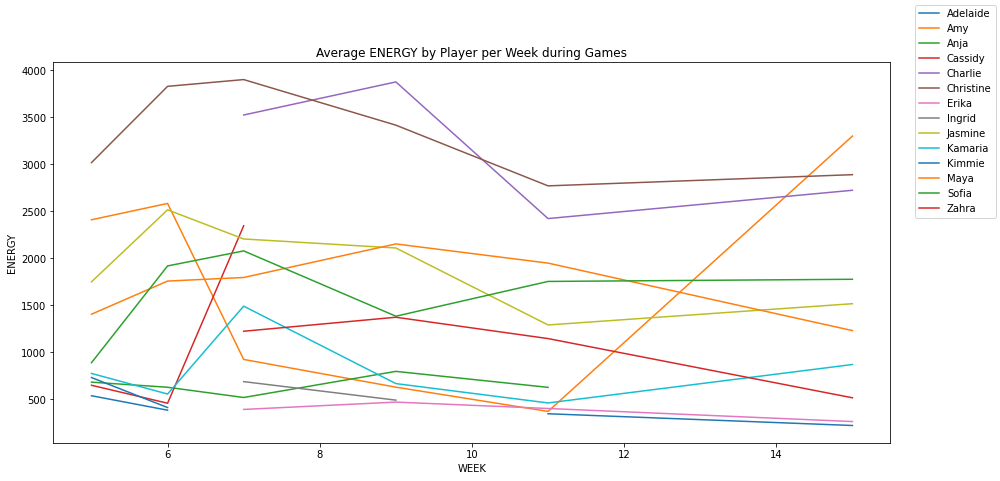

In [24]:
df_game = df_vb.loc[df_vb['EVENT TYPE'] == 'GAME']

# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df_game.groupby(['WEEK', 'PLAYER NAME']).mean()['ENERGY'].unstack().plot(ax=ax, legend=False)

fig.legend(loc="upper right")
plt.title("Average ENERGY by Player per Week during Games")
plt.ylabel("ENERGY")

Next, let's produce a matrix to evaluate the correlation between the "energy" metric and the other measures that we have in our current dataset. 

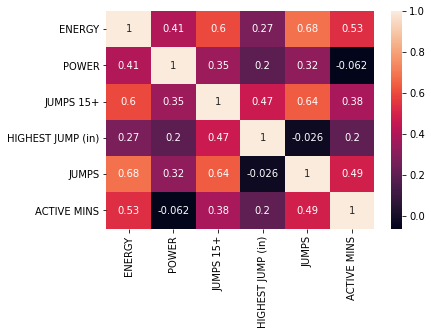

In [25]:
corrMatrix = df_vb.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

We can see from the heatmap that the energy metric is strongly correlated with both "jumps" and "jumps 15+".  Let's plot those directly to see the relationship.

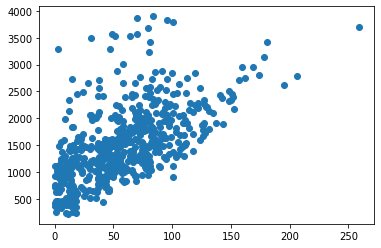

In [26]:
plt.scatter(df_vb['JUMPS 15+'], df_vb['ENERGY'])
plt.show()

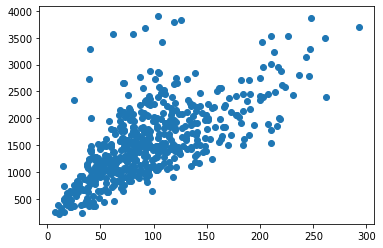

In [27]:
plt.scatter(df_vb['JUMPS'], df_vb['ENERGY'])
plt.show()

So, we see a pretty strong corrleation between the total number of jumps and the "energy" metric provided by VERT.  Keep in mind that this device is an accelerometer... and it is primarily measuring the vertical motion of the athlete.  However, do you think that body weight would be relevant if we were trying to measure the (actual) energy involved in a practice or competition!?  (Definitely!)  However, in many collegiate sports in the United States (including volleyball)-- body weight measures are not measured regularly as body image and disordered eating can be a common problem for high-level athletes.  So, this can be a little tricky.

This is something to keep in mind as we talk more about wearables and all of the different measures and metrics that they provide.  Some wearables will require body weight to be entered for their algorithms -- but certainly not all.  More to come about that in future lessons.